<a href="https://colab.research.google.com/github/brunoras/pokemon-edibility/blob/main/Neural_Network_Qual_Pok%C3%A9mon_Voc%C3%AA_Deve_Comer_no_Seu_Jantar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Deep Learning**

# **Importações**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# **Leirura dos arquivos**

**Leitura do dataframe com as descricões**

In [ ]:
df = pd.read_csv('pkmn_indices.csv')
df

,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight
0,Bulbasaur,0.0,0.866054,0.000000,0.0,1,6,1,3,50,45,6.9
1,Ivysaur,0.0,0.000000,0.000000,0.0,1,6,1,3,50,60,13.0
2,Venusaur,0.0,0.643694,0.000000,0.0,1,6,1,3,50,80,100.0
3,Charmander,0.0,0.000000,0.000000,0.0,2,0,2,3,50,39,8.5
4,Charmeleon,0.0,0.000000,0.000000,0.0,2,0,2,3,50,58,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,0.0,0.236841,0.000000,0.0,7,0,8,0,35,80,145.0
894,Regidrago,0.0,0.000000,0.000000,0.0,15,0,8,0,35,200,200.0
895,Glastrier,0.0,0.000000,0.000000,0.0,14,0,8,0,35,100,800.0
896,Spectrier,0.0,0.000000,0.000000,0.0,13,0,8,0,35,100,44.5


# **Neural Network**


## **Formando os vetores**

**Criando um dataframe com pokémons de fato comestíves**

Vamos usar como base os artigos:

https://www.thegamer.com/pokemon-humans-eat-confirmed/ 

https://m.bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon_food

E assumir que algumas de suas famílias evolucionairas também são comestíveis.


In [ ]:
edibles = ['Shuckle', 'Krabby', 'Kingler', 'Arrokuda', 'Barraskewda', 
           'Gabite', 'Garchomp', 'Appletun', 'Flapple', 'Slowpoke', 
           'Chansey', 'Blissey', "Farfetch'd", 'Cherubi', 'Cherrim', 
           'Sharpedo', 'Carvanha', 'Crabrawler', 'Crabominable', 'Mareep',
           'Basculin', 'Seadra', 'Clauncher', 'Crawdaunt', 'Flaaffy',
           'Ampharos', 'Miltank', 'Tauros',  'Grotle', 'Snover',
           'Tropius', 'Paras', 'Parasect', 'Skiddo', 'Combee', 
           'Vespiquen', 'Octillery', 'Ribombee', 'Goldeen', 'Seaking']
print(edibles)

['Shuckle', 'Krabby', 'Kingler', 'Arrokuda', 'Barraskewda', 'Gabite', 'Garchomp', 'Appletun', 'Flapple', 'Slowpoke', 'Chansey', 'Blissey', "Farfetch'd", 'Cherubi', 'Cherrim', 'Sharpedo', 'Carvanha', 'Crabrawler', 'Crabominable', 'Mareep', 'Basculin', 'Seadra', 'Clauncher', 'Crawdaunt', 'Flaaffy', 'Ampharos', 'Miltank', 'Tauros', 'Grotle', 'Snover', 'Tropius', 'Paras', 'Parasect', 'Skiddo', 'Combee', 'Vespiquen', 'Octillery', 'Ribombee', 'Goldeen', 'Seaking']


In [ ]:
df_edibles = df[df["pokemon"].isin(edibles)].reset_index(drop = False)
df_edibles['edible'] = list(np.ones(df_edibles.shape[0]))
df_edibles

,index,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
0,45,Paras,0.000000,0.000000,0.00000,0.000000,4,1,4,1,50,35,5.4,1.0
1,46,Parasect,0.000000,0.000000,0.00000,0.634730,4,1,4,1,50,60,29.5,1.0
2,78,Slowpoke,0.000000,0.000000,0.00000,0.000000,3,11,3,9,50,90,36.0,1.0
3,82,Farfetch'd,0.000000,0.000000,0.00000,0.000000,5,18,6,5,50,52,15.0,1.0
4,97,Krabby,0.000000,0.000000,0.00000,0.000000,3,0,11,0,50,30,6.5,1.0
5,98,Kingler,0.000000,0.000000,0.00000,0.000000,3,0,11,0,50,55,60.0,1.0
6,112,Chansey,0.000000,0.000000,0.00000,0.000000,5,0,7,0,140,250,34.6,1.0
7,116,Seadra,0.000000,0.212831,0.00000,0.000000,3,0,2,9,50,55,25.0,1.0
8,117,Goldeen,0.000000,0.178809,0.00000,0.000000,3,0,14,0,50,45,15.0,1.0
9,118,Seaking,0.000000,0.000000,0.00000,0.000000,3,0,14,0,50,80,39.0,1.0


In [ ]:
print('Temos {} pokémons comestíveis.'.format(df_edibles.shape[0]))

Temos 40 pokémons comestíveis.


**Criando um dataframe com pokémons de fato não-comestíves**

Para montar essa lista, escolhi pokémons evidentemente inorgânicos, como pedras e fantasmas, pokémons super inteligentes e pokémons confirmados pelos artigos acima como não-comestíveis.

In [ ]:
nonedibles = ['Porygon', 'Alakazam', 'Geodude', 'Grimer', 'Gastly',
              'Mr. Mime', 'Ditto', 'Houndour', 'Suicune', 'Arceus',
              'Trubbish', 'Slugma', 'Rotom', 'Toxel', 'Toxtricity',
              'Magikarp', 'Gyarados', 'Porygon2', 'Porygon-Z', 'Abra',
              'Kadabra', 'Graveler', 'Golem', 'Muk', 'Haunter',
              'Gengar', 'Mime Jr.', 'Mr. Rime', 'Houndoom', 'Garbodor',
              'Magcargo', 'Meowth', 'Persian', 'Perrserker', 'Slowking']
print(nonedibles)

['Porygon', 'Alakazam', 'Geodude', 'Grimer', 'Gastly', 'Mr. Mime', 'Ditto', 'Houndour', 'Suicune', 'Arceus', 'Trubbish', 'Slugma', 'Rotom', 'Toxel', 'Toxtricity', 'Magikarp', 'Gyarados', 'Porygon2', 'Porygon-Z', 'Abra', 'Kadabra', 'Graveler', 'Golem', 'Muk', 'Haunter', 'Gengar', 'Mime Jr.', 'Mr. Rime', 'Houndoom', 'Garbodor', 'Magcargo', 'Meowth', 'Persian', 'Perrserker', 'Slowking']


In [ ]:
df_nonedibles = df[df["pokemon"].isin(nonedibles)].reset_index(drop = False)
df_nonedibles['edible'] = list(np.zeros(df_nonedibles.shape[0]))
df_nonedibles

,index,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
0,51,Meowth,0.000000,0.000000,0.000000,0.000000,5,0,6,0,50,40,4.2,0.0
1,52,Persian,0.000000,0.000000,0.000000,0.000000,5,0,6,0,50,65,32.0,0.0
2,62,Abra,0.000000,0.000000,0.000000,0.000000,11,0,10,0,50,25,19.5,0.0
3,63,Kadabra,0.000000,0.000000,0.000000,0.000000,11,0,10,0,50,40,56.5,0.0
4,64,Alakazam,0.000000,0.000000,0.000000,0.312484,11,0,10,0,50,55,48.0,0.0
5,73,Geodude,0.000000,0.000000,0.000000,0.000000,12,8,12,0,50,40,20.0,0.0
6,74,Graveler,0.000000,0.000000,0.000000,0.000000,12,8,12,0,50,55,105.0,0.0
7,75,Golem,0.000000,0.000000,0.000000,0.000000,12,8,12,0,50,80,300.0,0.0
8,87,Grimer,0.570329,0.000000,0.000000,0.000000,6,0,13,0,50,80,30.0,0.0
9,88,Muk,0.794092,0.000000,0.000000,0.000000,6,0,13,0,50,105,30.0,0.0


In [ ]:
print('Temos {} pokémons não-comestíveis.'.format(df_nonedibles.shape[0]))

Temos 35 pokémons não-comestíveis.


**Concatenando os dataframes, com os comestíveis no topo**

In [ ]:
df_train = pd.concat([df_edibles, df_nonedibles], axis=0).reset_index(drop = True)
df_train.set_index(keys = 'index', inplace = True)
df_train.index.name = None
df_train

,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
45,Paras,0.000000,0.0,0.000000,0.000000,4,1,4,1,50,35,5.4,1.0
46,Parasect,0.000000,0.0,0.000000,0.634730,4,1,4,1,50,60,29.5,1.0
78,Slowpoke,0.000000,0.0,0.000000,0.000000,3,11,3,9,50,90,36.0,1.0
82,Farfetch'd,0.000000,0.0,0.000000,0.000000,5,18,6,5,50,52,15.0,1.0
97,Krabby,0.000000,0.0,0.000000,0.000000,3,0,11,0,50,30,6.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Garbodor,0.187697,0.0,0.000000,0.340485,6,0,12,0,50,80,107.3,0.0
847,Toxel,1.420653,0.0,0.276686,0.000000,7,6,8,0,50,40,11.0,0.0
848,Toxtricity,0.000000,0.0,0.000000,0.000000,7,6,10,0,50,75,40.0,0.0
862,Perrserker,0.000000,0.0,0.000000,0.000000,17,0,6,0,50,70,28.0,0.0


**Criando o modelo**

In [ ]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (11,1)),
                           keras.layers.Dense(1024, activation = tf.nn.relu),
                           keras.layers.Dense(512, activation = tf.nn.relu),
                           keras.layers.Dense(256, activation = tf.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(2, activation = tf.nn.softmax)])
 
modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

# **Treinando o modelo**

**Dividindo em treino e teste**

In [ ]:
train, test = train_test_split(df_train.drop(columns = 'pokemon'), test_size=0.2)

**Treinado**

In [ ]:
historico = modelo.fit(train.drop(columns = 'edible'), train['edible'], epochs = 25, verbose = False)

**Gráficos de Acurácia e perda através das épocas**

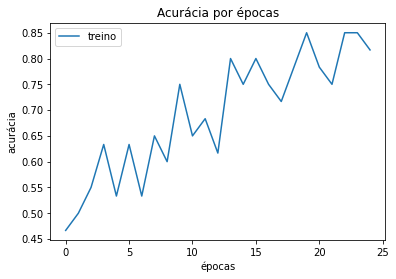

In [ ]:
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por épocas') 
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.show()

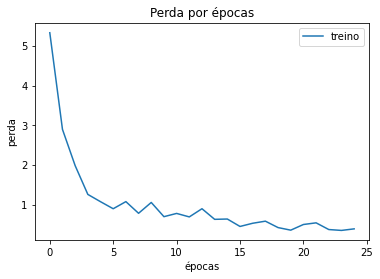

In [ ]:
plt.plot(historico.history['loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda') 
plt.legend(['treino', 'validação'])
plt.show()

**Testando o modelo**

In [ ]:
modelo.predict(test.drop(columns = 'edible'))
perda, acuracia = modelo.evaluate(test.drop(columns = 'edible'), test['edible'])
print('acertos: ', acuracia * test.shape[0])

1/1 [==============================] - 0s 296ms/step - loss: 0.6197 - accuracy: 0.7333
acertos:  11.000000238418579


Em média temos 70% de acurácia.

# **Salvando e vendo resultados**

**Salvando o modelo**

In [ ]:
modelo.save('modelo 7.h5')
modelo_salvo = load_model('modelo 7.h5')

**Preparando o dataframe para receber os valores preditos**

In [ ]:
df_questao = df[~df['pokemon'].isin(df_train['pokemon'])].reset_index(drop = False)
df_questao['edible'] = list(-np.ones(df_questao.shape[0]))
df_questao

,index,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
0,0,Bulbasaur,0.0,0.866054,0.000000,0.0,1,6,1,3,50,45,6.9,-1.0
1,1,Ivysaur,0.0,0.000000,0.000000,0.0,1,6,1,3,50,60,13.0,-1.0
2,2,Venusaur,0.0,0.643694,0.000000,0.0,1,6,1,3,50,80,100.0,-1.0
3,3,Charmander,0.0,0.000000,0.000000,0.0,2,0,2,3,50,39,8.5,-1.0
4,4,Charmeleon,0.0,0.000000,0.000000,0.0,2,0,2,3,50,58,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,893,Regieleki,0.0,0.236841,0.000000,0.0,7,0,8,0,35,80,145.0,-1.0
819,894,Regidrago,0.0,0.000000,0.000000,0.0,15,0,8,0,35,200,200.0,-1.0
820,895,Glastrier,0.0,0.000000,0.000000,0.0,14,0,8,0,35,100,800.0,-1.0
821,896,Spectrier,0.0,0.000000,0.000000,0.0,13,0,8,0,35,100,44.5,-1.0


**Prevendo os resultados e colocando no dataframe**

In [ ]:
predicao = modelo_salvo.predict(df_questao.drop(columns = ['pokemon', 'index', 'edible']))

In [ ]:
for n in range(len(predicao)):
  df_questao['edible'][n] = np.argmax(predicao[n])
df_questao.set_index(keys = 'index', inplace = True)
df_questao.index.name = None
df_questao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
0,Bulbasaur,0.0,0.866054,0.000000,0.0,1,6,1,3,50,45,6.9,1.0
1,Ivysaur,0.0,0.000000,0.000000,0.0,1,6,1,3,50,60,13.0,1.0
2,Venusaur,0.0,0.643694,0.000000,0.0,1,6,1,3,50,80,100.0,1.0
3,Charmander,0.0,0.000000,0.000000,0.0,2,0,2,3,50,39,8.5,1.0
4,Charmeleon,0.0,0.000000,0.000000,0.0,2,0,2,3,50,58,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,0.0,0.236841,0.000000,0.0,7,0,8,0,35,80,145.0,1.0
894,Regidrago,0.0,0.000000,0.000000,0.0,15,0,8,0,35,200,200.0,1.0
895,Glastrier,0.0,0.000000,0.000000,0.0,14,0,8,0,35,100,800.0,0.0
896,Spectrier,0.0,0.000000,0.000000,0.0,13,0,8,0,35,100,44.5,0.0


**Juntando as predições com os dados de treino e teste**

In [ ]:
df_final = pd.concat([df_train, df_questao], axis=0)
df_final.sort_index(ascending=True, inplace=True)
df_final

,pokemon,toxicity,nutritivity,social,psicology,type_1,type_2,egg_1,egg_2,friendship,hp,weight,edible
0,Bulbasaur,0.0,0.866054,0.000000,0.0,1,6,1,3,50,45,6.9,1.0
1,Ivysaur,0.0,0.000000,0.000000,0.0,1,6,1,3,50,60,13.0,1.0
2,Venusaur,0.0,0.643694,0.000000,0.0,1,6,1,3,50,80,100.0,1.0
3,Charmander,0.0,0.000000,0.000000,0.0,2,0,2,3,50,39,8.5,1.0
4,Charmeleon,0.0,0.000000,0.000000,0.0,2,0,2,3,50,58,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,0.0,0.236841,0.000000,0.0,7,0,8,0,35,80,145.0,1.0
894,Regidrago,0.0,0.000000,0.000000,0.0,15,0,8,0,35,200,200.0,1.0
895,Glastrier,0.0,0.000000,0.000000,0.0,14,0,8,0,35,100,800.0,0.0
896,Spectrier,0.0,0.000000,0.000000,0.0,13,0,8,0,35,100,44.5,0.0


**E voilà, temos uma lista com os pokémons não-comestíveis e outra com os comestíveis (com 70% de acurácia)**

Não-comestíveis

In [ ]:
list(df_final.pokemon.loc[df_final['edible'] == 0])

['Sandslash',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Mankey',
 'Primeape',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Tentacool',
 'Geodude',
 'Graveler',
 'Golem',
 'Magneton',
 'Grimer',
 'Muk',
 'Cloyster',
 'Gastly',
 'Haunter',
 'Gengar',
 'Onix',
 'Drowzee',
 'Voltorb',
 'Hitmonlee',
 'Hitmonchan',
 'Weezing',
 'Staryu',
 'Mr. Mime',
 'Jynx',
 'Electabuzz',
 'Magikarp',
 'Gyarados',
 'Ditto',
 'Porygon',
 'Omanyte',
 'Kabuto',
 'Kabutops',
 'Snorlax',
 'Articuno',
 'Dratini',
 'Dragonair',
 'Dragonite',
 'Mewtwo',
 'Pichu',
 'Cleffa',
 'Togepi',
 'Sudowoodo',
 'Espeon',
 'Umbreon',
 'Murkrow',
 'Slowking',
 'Misdreavus',
 'Unown',
 'Steelix',
 'Sneasel',
 'Slugma',
 'Magcargo',
 'Swinub',
 'Piloswine',
 'Mantine',
 'Skarmory',
 'Houndour',
 'Houndoom',
 'Phanpy',
 'Porygon2',
 'Tyrogue',
 'Hitmontop',
 'Smoochum',
 'Elekid',
 'Raikou',
 'Suicune',
 'Pupitar',
 'Tyranitar',
 'Lugia',
 'Ho-Oh',
 'Poochyena',
 'Mightyena',
 'Ralts',
 'Kirlia',
 'Gardevoir',
 'Shedinja'

Comestíveis

In [ ]:
list(df_final.pokemon.loc[df_final['edible'] == 1])

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Psyduck',
 'Golduck',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Tentacruel',
 'Ponyta',
 'Rapidash',
 'Slowpoke',
 'Slowbro',
 'Magnemite',
 "Farfetch'd",
 'Doduo',
 'Dodrio',
 'Seel',
 'Dewgong',
 'Shellder',
 'Hypno',
 'Krabby',
 'Kingler',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Cubone',
 